# Epidemiological Model Assignment - Parameter exploration

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
import seaborn as sns

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

In [2]:
# SIRD model implementation (reused from computer practical 2)
def sird_model(y, t, beta, gamma, mu):
    """SIRD model with death compartment.

    Args:
        y (list or array): Initial conditions for the compartments [S, I, R, D].
        t (float): Time point (in days).
        beta (float): Transmission rate (probability of disease spread per contact).
        gamma (float): Recovery rate (rate at which infectious individuals recover).
        mu (float): Mortality rate (rate at which infectious individuals die).

    Returns:
        tuple (dSdt, dIdt, dRdt, dDdt): Rates of change for each compartment .
    """
    S, I, R, D = y 
    N = S + I + R + D

    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I

    return dSdt, dIdt, dRdt, dDdt

In [3]:
def run_sird_simulation(beta, gamma, mu, N=1000, I0=10, days=150):
    """Runs the SIRD model simulation.

    Args:
        beta (float): Transmission rate.
        gamma (float): Recovery rate.
        mu (float): Mortality rate.
        N (int, optional): Total population size. Defaults to 1000.
        I0 (int, optional): Initial number of infectious individuals. Defaults to 10.
        days (int, optional): Number of days to simulate. Defaults to 150.

    Returns:
        tuple: (t, S, I, R, D) where:
            t (numpy.ndarray): Array of time points (in days).
            S (numpy.ndarray): Array of susceptible population over time.
            I (numpy.ndarray): Array of infectious population over time.
            R (numpy.ndarray): Array of recovered population over time.
            D (numpy.ndarray): Array of deaths over time.
    """

    S0 = N - I0
    R0 = 0
    D0 = 0
    y0 = [S0, I0, R0, D0]

    t = np.linspace(0, days, days)
    sol = odeint(sird_model, y0, t, args=(beta, gamma, mu))
    S, I, R, D = sol.T

    return t, S, I, R, D

## Part 1: Parameter analysis function (50 points)

### 1.1 Function implementation

see below

### 1.2 Requirements

- Test recovery rates: gamma_values = [0.05, 0.1, 0.15, 0.2, 0.25]
- For each γ value, calculate:

    - Peak number of infectious individuals
    - Day when peak occurs
    - Total deaths at end of simulation
    - Basic reproduction number (R₀ = β/γ)

- Return results as a formatted pandas DataFrame
- Generate a publication-quality plot showing all epidemic curves

### 1.3 Expected output format

Your function should produce:

- A DataFrame with columns: ['gamma', 'R0', 'peak_infected', 'peak_day', 'total_deaths']
- A matplotlib figure with properly labeled axes, legend, and title


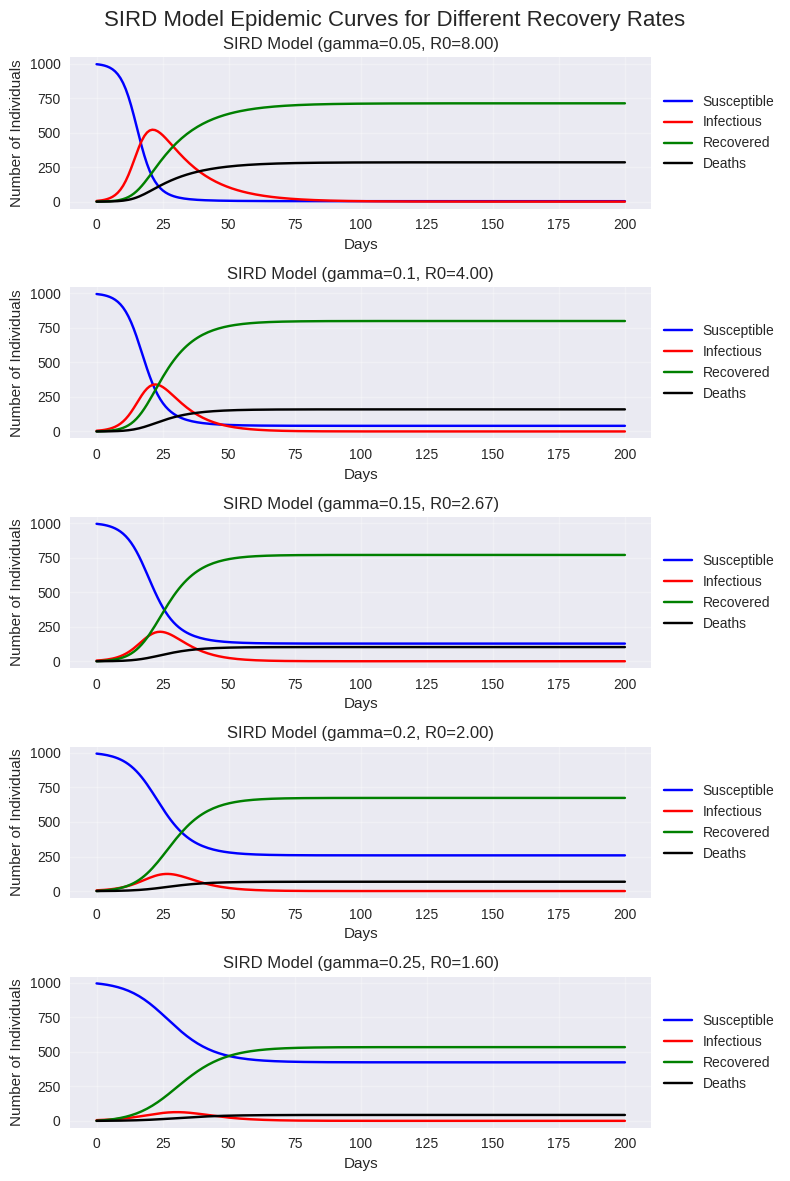

Parameter Analysis Results:
   gamma   R0  peak_infected  peak_day  total_deaths
0    0.0  8.0          520.8        21         284.8
1    0.1  4.0          340.3        22         159.9
2    0.2  2.7          213.5        24         102.6
3    0.2  2.0          123.8        27          67.4
4    0.2  1.6           63.1        30          42.7


In [4]:
def analyze_recovery_rates(beta, mu, N, I0, simulation_days):
    """Analyze epidemic outcomes for different recovery rates. With gamma values: [0.05, 0.1, 0.15, 0.2, 0.25]
    
    Args:
        beta (float): Transmission rate.
        mu (float): Mortality rate.
        N (int): Total population.
        I0 (int): Initial infected individuals.
        simulation_days (int): Simulation duration in days.

    Returns:
        pandas.DataFrame: Results summary for each recovery rate.
    """
    # Define recovery rates to analyze
    gamma_values = [0.05, 0.1, 0.15, 0.2, 0.25]

    # Prepare to store results and plots
    results = []
    fig, axes = plt.subplots(5, 1, figsize=(8, 12))
    fig.suptitle('SIRD Model Epidemic Curves for Different Recovery Rates', fontsize=16)

    for i, gamma in enumerate(gamma_values):
        #  Run simulation to get data
        t, S, I, R, D = run_sird_simulation(beta, gamma, mu, N=N, I0=I0, days=simulation_days)

        # Calculate metrics
        peak_infected = max(I)
        peak_day = np.argmax(I)
        total_deaths = D[-1]
        R0 = beta / gamma

        # Store results
        results.append({
            "gamma": gamma,
            "R0": R0,
            "peak_infected": peak_infected,
            "peak_day": peak_day,
            "total_deaths": total_deaths
        })

        # SIRD curves
        axes[i].plot(t, S, label='Susceptible', color='blue')
        axes[i].plot(t, I, label='Infectious', color='red')
        axes[i].plot(t, R, label='Recovered', color='green')
        axes[i].plot(t, D, label='Deaths', color='black')
        axes[i].set_title(f'SIRD Model (gamma={gamma}, R0={R0:.2f})')
        axes[i].set_xlabel('Days')
        axes[i].set_ylabel('Number of Individuals')
        axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
        axes[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    results_df = pd.DataFrame(results)
    print("Parameter Analysis Results:")
    print(results_df.round(1))

    return results_df

# Example usage
results_df: pd.DataFrame = analyze_recovery_rates(beta=0.4, mu=0.02, N=1000, I0=5, simulation_days=200)

## Part 2: Scenario comparison (30 points)

2.1 Run both scenarios using your function

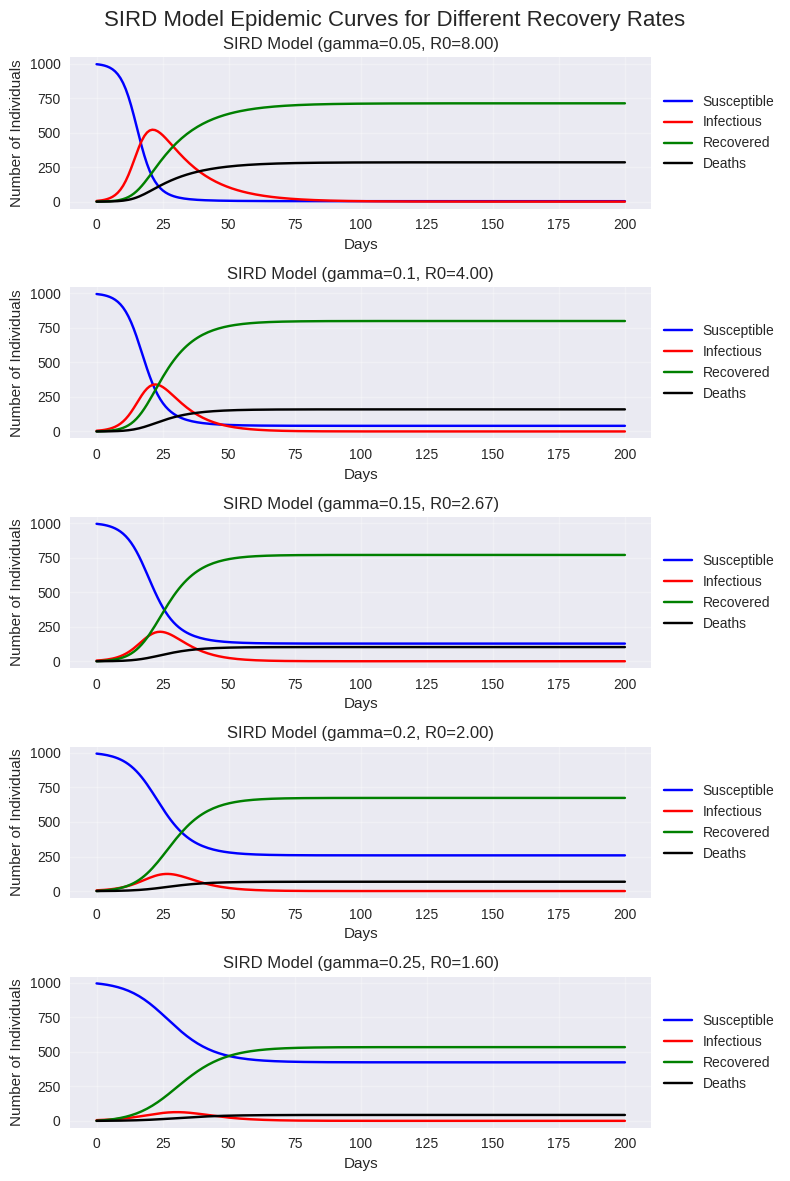

Parameter Analysis Results:
   gamma   R0  peak_infected  peak_day  total_deaths
0    0.0  8.0          520.8        21         284.8
1    0.1  4.0          340.3        22         159.9
2    0.2  2.7          213.5        24         102.6
3    0.2  2.0          123.8        27          67.4
4    0.2  1.6           63.1        30          42.7


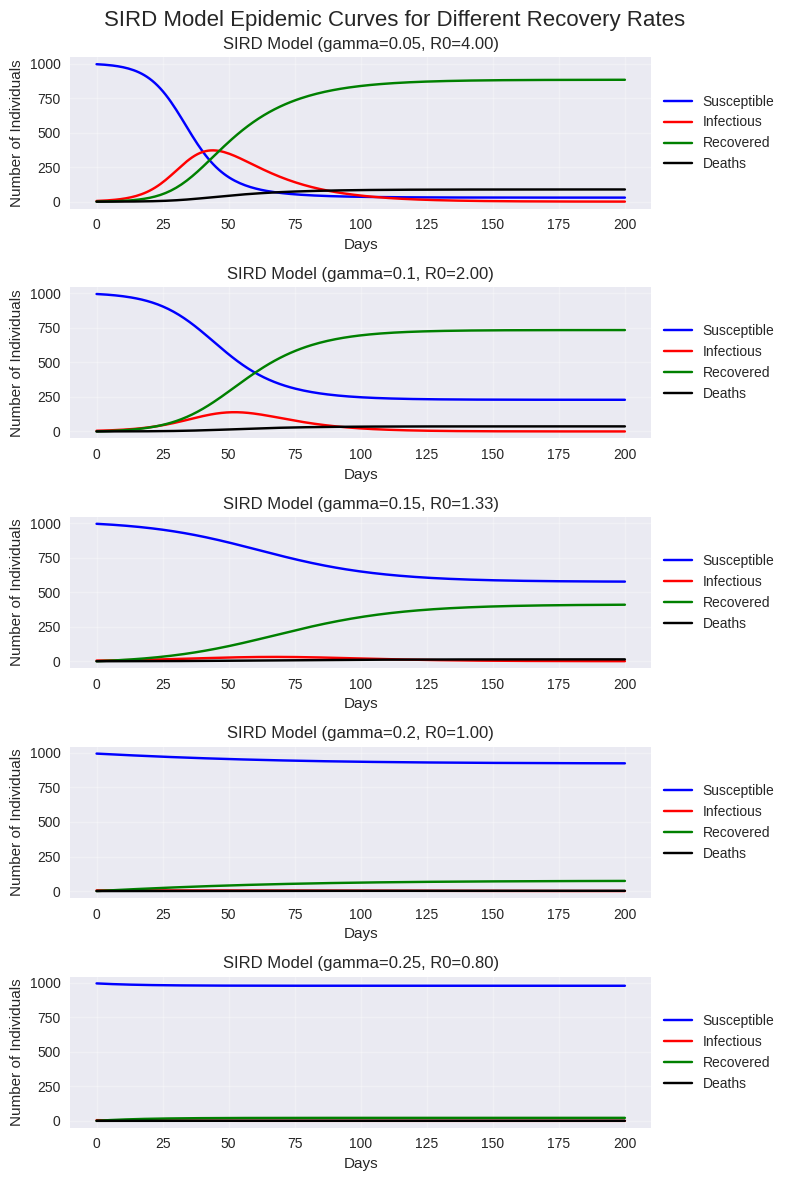

Parameter Analysis Results:
   gamma   R0  peak_infected  peak_day  total_deaths
0    0.0  4.0          371.3        44          88.2
1    0.1  2.0          139.3        52          36.7
2    0.2  1.3           31.3        67          13.6
3    0.2  1.0            5.0         0           1.8
4    0.2  0.8            5.0         0           0.4


In [5]:
# Scenario A
results_df_A = analyze_recovery_rates(beta=0.4, mu=0.02, N=1000, I0=5, simulation_days=200)

# Scenario B
results_df_B = analyze_recovery_rates(beta=0.2, mu=0.005, N=1000, I0=5, simulation_days=200)

2.2 Display both result DataFrames

In [6]:
results_df_A

,gamma,R0,peak_infected,peak_day,total_deaths
0,0.05,8.000000,520.757922,21,284.757434
1,0.10,4.000000,340.259908,22,159.892366
2,0.15,2.666667,213.467271,24,102.610885
3,0.20,2.000000,123.830763,27,67.423926
4,0.25,1.600000,63.070351,30,42.694003


In [7]:
results_df_B

,gamma,R0,peak_infected,peak_day,total_deaths
0,0.05,4.000000,371.304875,44,88.225824
1,0.10,2.000000,139.343938,52,36.700237
2,0.15,1.333333,31.343160,67,13.642779
3,0.20,1.000000,5.000000,0,1.832013
4,0.25,0.800000,5.000000,0,0.433167


2.3 Create a comparative visualization (side-by-side plots or combined plot)

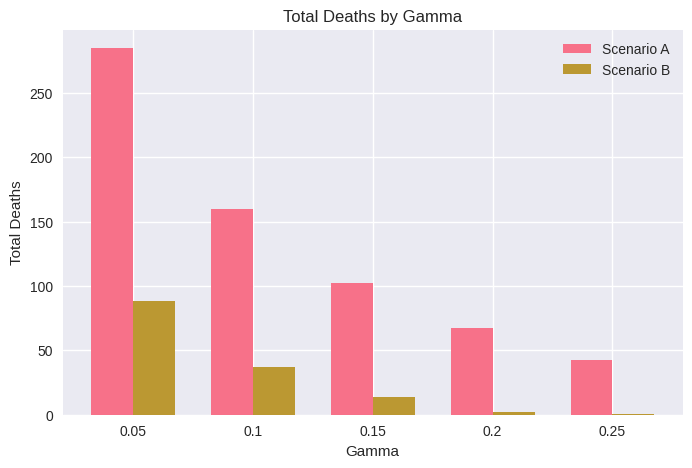

In [8]:
gammas = results_df_A['gamma']
total_deaths_A = results_df_A['total_deaths']
total_deaths_B = results_df_B['total_deaths']

x = np.arange(len(gammas))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - width/2, total_deaths_A, width, label='Scenario A')
ax.bar(x + width/2, total_deaths_B, width, label='Scenario B')

ax.set_xlabel('Gamma')
ax.set_ylabel('Total Deaths')
ax.set_title('Total Deaths by Gamma')
ax.set_xticks(x)
ax.set_xticklabels(gammas)
ax.legend()

plt.show()

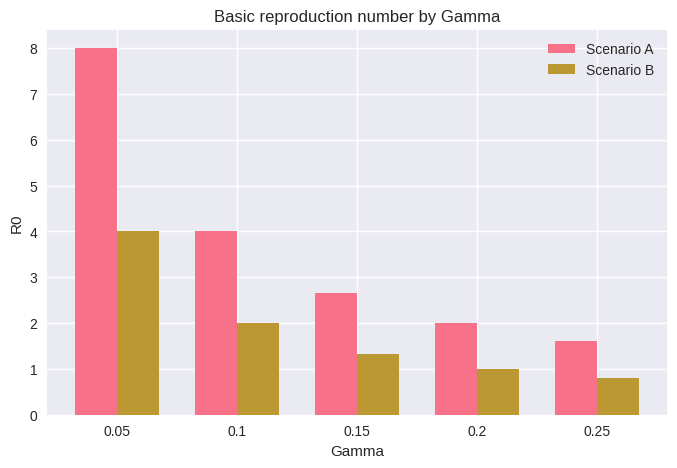

In [9]:
gammas = results_df_A['gamma']
R0_A = results_df_A['R0']
R0_B = results_df_B['R0']

x = np.arange(len(gammas))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - width/2, R0_A, width, label='Scenario A')
ax.bar(x + width/2, R0_B, width, label='Scenario B')

ax.set_xlabel('Gamma')
ax.set_ylabel('R0')
ax.set_title('Basic reproduction number by Gamma')
ax.set_xticks(x)
ax.set_xticklabels(gammas)
ax.legend()

plt.show()

2.4 Write a markdown cell analyzing which scenario is worse for public health and why

For each value of gamma, the number of total deaths and peak infected is greater in scenario A. 

Furthermore, for values of gamma that enabled transmission beyond the orginal 5 people, the peak number of infected occured earlier in scenario A. While the current simulation does not account for it, an earlier peak infected translates into a smaller window for public health interventions to be effective. Measures like lockdowns or testing would be most impactful if they can be implemented before the peak in infected happens. Scenario B leaves more time for that to happen.

Thus, scenario A represents a worse situation for public health.

3.1 Parameter Analysis Impact

- How does increasing recovery rate affect peak infections, total deaths, and epidemic duration?

Increasing recovery rate directly affects the outcome of the epidemic. In Scenario A increasing gamma from 0.05 to 0.25 reduces the peak number of infected indivudals from 520.8 to 63.1 which is a reduction of 88%. This in turn slows down the spread of the disease and severity of the outbreak. In terms of total deaths with less people getting infected and being infected for a shorter period of time, the number of deaths decrease. If we look at Scenario A again, increasing gamma from 0.05 to 0.25 the total deaths decrease from 284.8 to 42.7 which is a decrease of roughly a factor of 6. 
Epidemic duration is longer tho, an increased recovery rate "flattens the curve", the peak of infections is lower and happens later in the epidemic. Looking at Scenario A, the peak day shifts from 21 to 30.


3.2 Intervention Analysis

- If an intervention could increase recovery rate by 50%, what would be the expected impact on total deaths?

As mentioned in 3.1, increasing recovery rate can reduce total deaths. Taking Scenario A as a baseline with gamma = 0.10, total deaths are 159.9. A 50% increase would mean a gamma of 0.15, and the resulting total deaths are 102.6. Total death reduction is equal to 159.9 - 102.6 = 57.3. 57.3/159.9 * 100 = 35.8% reduction. In short: an 50% increase in recovery rate would reduce total deaths by about 35.8%.


3.3 Real-world application

- Name one real medical intervention that could increase recovery rates

A real medical intervention that has the potential to increase recovery rate is antiviral medication. During the Covid19 pandemic this could be Paxlovid for example.
- Explain the mechanism and estimate realistic effectiveness.

Antiviral drugs work by blocking viral replication within the body. by slowing or stopping the multiplication of viral cells, the symptoms can be less severe and decrease the period in which patients are infectious to others. Combined this can lead to a direct increase in recovery rate and in turn a decrease of total deaths as proven before in 3.2. An effectiveness of 50% even if deployed early on seems quite high, a conservative estimate of 15-25% would be more probable in my opinion. This could have direct correlatio with a reduction in deaths but not as high as in the simple SIRD models as numerous other factors play a role in real life infectious diseases such as social behavior, government response, etc. 
